
# Desafio Cientista de Dados INDICIUM - Davi Ribeiro


## Importing libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import seaborn as sns

In [2]:
df = pd.read_csv("teste_indicium_precificacao.csv")
df.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


## Exploratory Data Analysis

In [3]:
df.isna().sum()

id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64

In [4]:
# Dropping unnecessary columns
df.drop(columns=['id', 'host_name', 'ultima_review', 'reviews_por_mes'], inplace=True)

In [5]:
# Just making the name smaller
df.rename(columns={'calculado_host_listings_count': 'host_listings_count'}, inplace=True)

In [6]:
df['bairro_group'].value_counts()
# 5 different groups

Manhattan        21661
Brooklyn         20103
Queens            5666
Bronx             1091
Staten Island      373
Name: bairro_group, dtype: int64

In [7]:
df['bairro'].value_counts()
# 221 different "bairros"

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: bairro, Length: 221, dtype: int64

In [8]:
df['room_type'].value_counts()

Entire home/apt    25409
Private room       22325
Shared room         1160
Name: room_type, dtype: int64

### Analysis of the price based on some features

Mean price of Entire home/apt: U$211.79


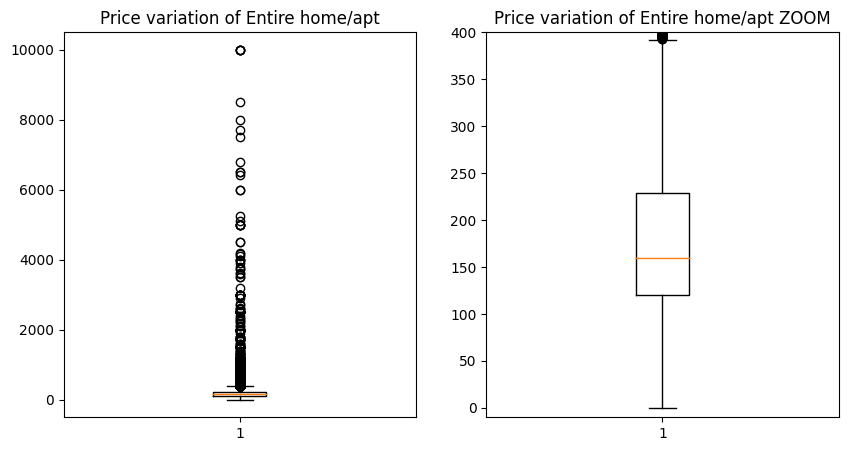

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].boxplot(df[df['room_type'] == "Entire home/apt"]['price'])
axes[0].set_title('Price variation of Entire home/apt')

axes[1].boxplot(df[df['room_type'] == "Entire home/apt"]['price'])
axes[1].set_title('Price variation of Entire home/apt ZOOM')
axes[1].set_ylim(-10, 400);
print(f'Mean price of Entire home/apt: U${np.mean(df[df["room_type"] == "Entire home/apt"]["price"]):.2f}')


As we can see the price varies a lot, with several outliers, but by zooming in on the boxplot we can see that the price is mainly concentrated between __100 and 250.__

Mean price of Private room: U$89.78


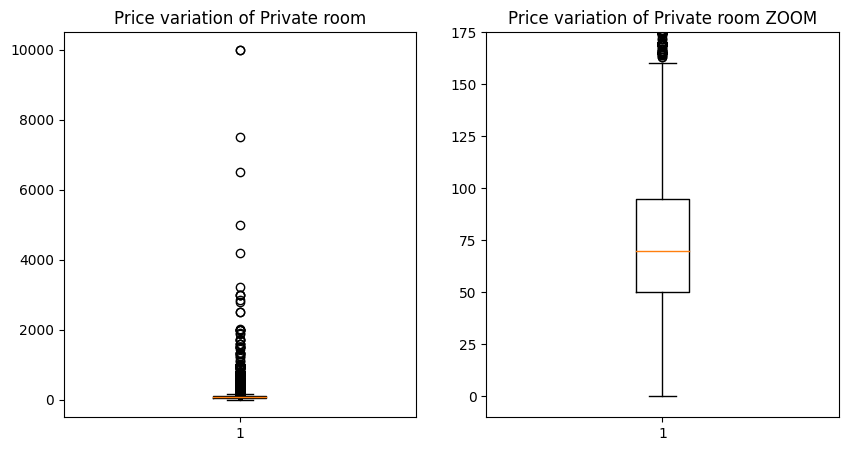

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].boxplot(df[df['room_type'] == "Private room"]['price'])
axes[0].set_title('Price variation of Private room')

axes[1].boxplot(df[df['room_type'] == "Private room"]['price'])
axes[1].set_title('Price variation of Private room ZOOM')
axes[1].set_ylim(-10, 175);
print(f'Mean price of Private room: U${np.mean(df[df["room_type"] == "Private room"]["price"]):.2f}')


As we saw in the previous boxplot for Entire home/apt, in this one the price also varies a lot, with several outliers, but by zooming in on the boxplot we can see that the price is concentrated between __50 and 100.__

Mean price of Shared room: U$70.13


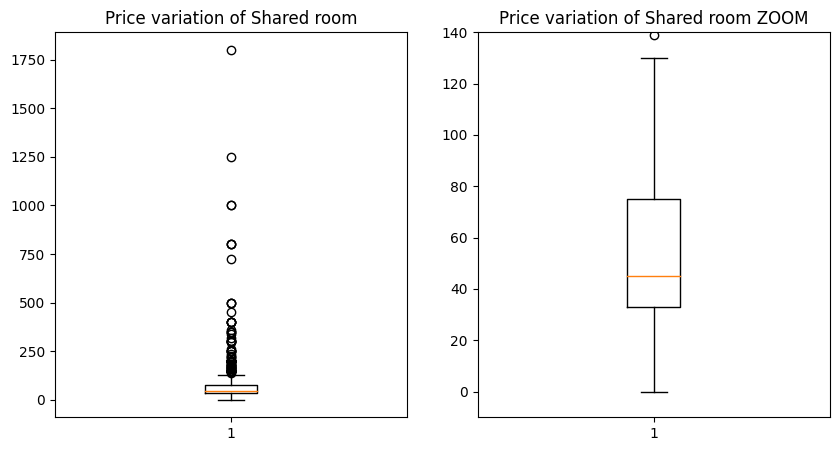

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].boxplot(df[df['room_type'] == "Shared room"]['price'])
axes[0].set_title('Price variation of Shared room')

axes[1].boxplot(df[df['room_type'] == "Shared room"]['price'])
axes[1].set_title('Price variation of Shared room ZOOM')
axes[1].set_ylim(-10, 140);
print(f'Mean price of Shared room: U${np.mean(df[df["room_type"] == "Shared room"]["price"]):.2f}')


As in the previous boxplots, the price varies a lot, with several outliers, but by zooming in on the boxplot we can see that the price is concentrated between __30 and 80.__ This is interesting, because the shared room could have the same price as the private room , which in theory, more private is more comfortable and should be more expensive, but the price is almost the same.

In [12]:
# Pivoting to see bairro group and room type averages
pivot_room_bairro = df.pivot_table(values='price', index='bairro_group', columns='room_type', aggfunc=np.mean)
pivot_room_bairro

room_type,Entire home/apt,Private room,Shared room
bairro_group,,,
Bronx,127.506596,66.788344,59.800000
Brooklyn,178.327545,76.492942,50.527845
Manhattan,249.239109,116.776622,88.977083
Queens,147.050573,71.762456,69.020202
Staten Island,173.846591,62.292553,57.444444


In [13]:
# Sorting the the means to see which bairro_group is more expensive
pivot_bairro = df.pivot_table(values='price', index='bairro_group', aggfunc=np.mean)
pivot_bairro.sort_values(by='price', ascending=False)

,price
bairro_group,
Manhattan,196.875814
Brooklyn,124.381983
Staten Island,114.812332
Queens,99.517649
Bronx,87.496792


Here we can clearly see that across all room types, Manhattan is the most expensive place to stay, and the cheapest place is the Bronx. And it is expected that as Manhattan is a large commercial, financial and cultural center, and this attracts many tourists, and is guided by the law of supply and demand, the more people want to stay in a place, the more expensive it becomes.

### Analysis of _minimo noites_

(0.0, 15.0)

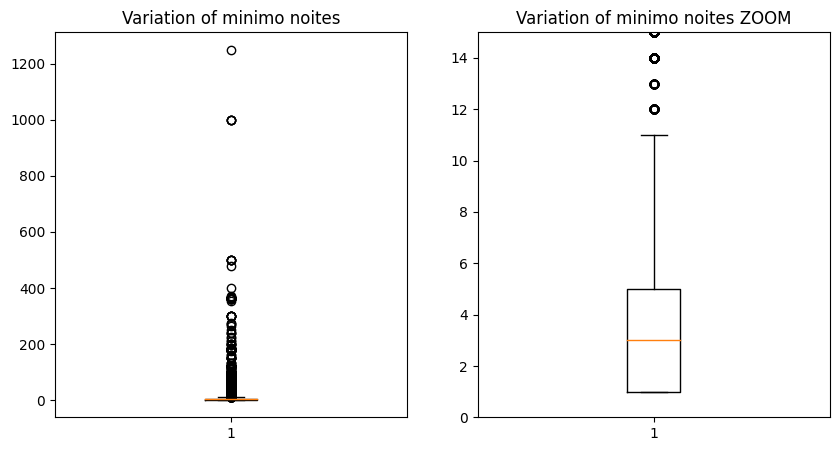

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].boxplot(df['minimo_noites'])
axes[0].set_title('Variation of minimo noites')

axes[1].boxplot(df['minimo_noites'])
axes[1].set_title('Variation of minimo noites ZOOM')
axes[1].set_ylim(0, 15)


This is interesting, the number of _minimum nights_ is concentrated between __1 and 5__, but we have many outliers, that the rent for the _minimo noites_ is 1250(more than 3 years) as we can see above.

In [15]:
df[df['minimo_noites'] == df['minimo_noites'].max()]

,nome,host_id,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,host_listings_count,disponibilidade_365
5766,Prime W. Village location 1 bdrm,17550546,Manhattan,Greenwich Village,40.73293,-73.99782,Entire home/apt,180,1250,2,1,365


### Analysis of _calculado_host_listings_count_

We have to be careful here because this variable depends on the host, so we can't repeat the hosts.

In [16]:
df['host_id'].duplicated().sum()
# Like expected, we have a lot of duplicated hosts

11437

In [17]:
df_host_listings_count = df.drop_duplicates(subset='host_id', keep='first').reset_index(drop=True)

(0.0, 5.0)

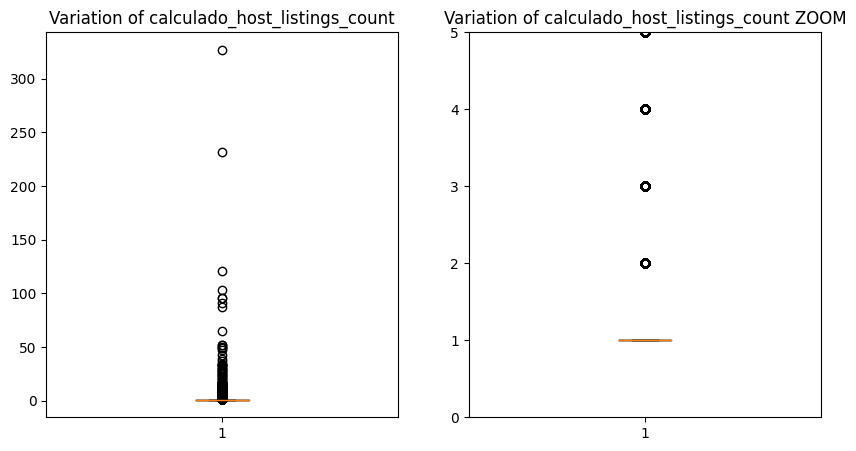

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].boxplot(df_host_listings_count['host_listings_count'])
axes[0].set_title('Variation of calculado_host_listings_count')

axes[1].boxplot(df_host_listings_count['host_listings_count'])
axes[1].set_title('Variation of calculado_host_listings_count ZOOM')
axes[1].set_ylim(0, 5)


In [19]:
num_of_multiple_listing = df_host_listings_count[df_host_listings_count['host_listings_count'] > 1].shape[0]
num_of_multiple_listing

5154

In [20]:
num_of_unique_listing = df_host_listings_count[df_host_listings_count['host_listings_count'] == 1].shape[0]
num_of_unique_listing

32303

In [21]:
print(f"With the calculations above, {num_of_multiple_listing / df_host_listings_count.shape[0] * 100:.2f}% are owners of multiple listings, that means that could be a real estate agency")

With the calculations above, 13.76% are owners of multiple listings, that means that could be a real estate agency


In [22]:
print(f"With the calculations above, {num_of_unique_listing / df_host_listings_count.shape[0] * 100:.2f}% are owners of unique listings, that means that could be a normal person listing their house")

With the calculations above, 86.24% are owners of unique listings, that means that could be a normal person listing their house


### Plotting Correlation map

In [23]:
df_encoded = pd.concat((df, pd.get_dummies(df['room_type'], dtype=int)), axis=1).drop(columns=['room_type'])
df_encoded = pd.concat((df_encoded, pd.get_dummies(df['bairro_group'], dtype=int)), axis=1).drop(columns=['bairro_group'])

In [24]:
# Being sure that only numeric features are on the correlation map
corr_matrix = df_encoded.select_dtypes(include=['number']).drop(columns=['host_id', 'latitude', 'longitude']).corr()
mask = np.triu(np.ones_like(corr_matrix))

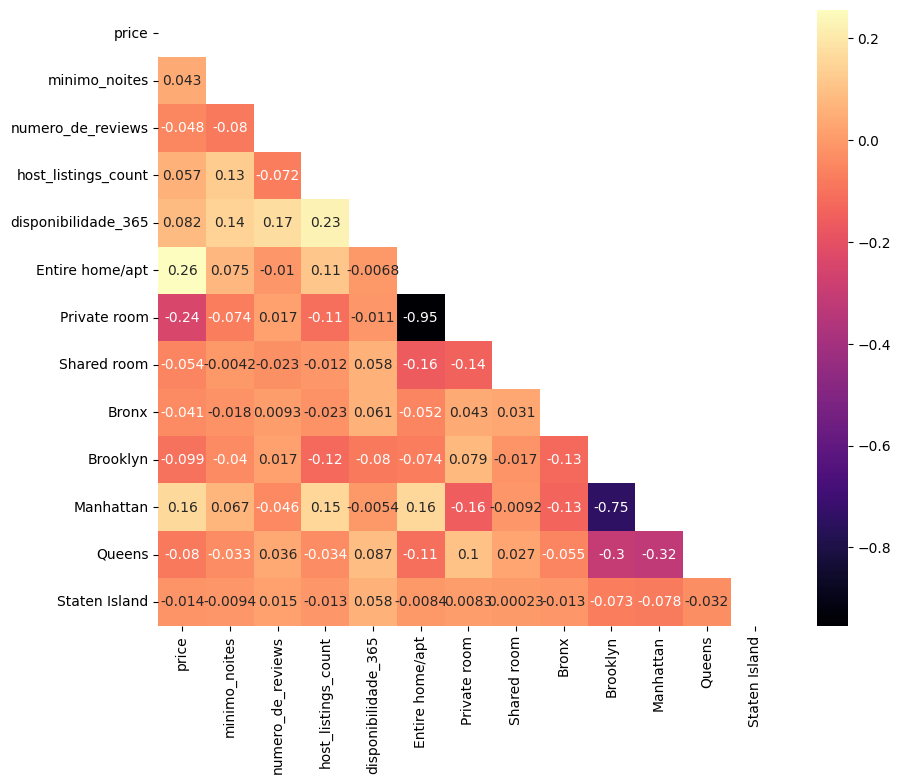

In [25]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, mask=mask, cmap='magma');

Looking at the correlation map we can't find any big correlation, the only thing we can take from it is the correlation between _price_ and _Entire home/apt_ and _price_ and _Private room_ which respectively says that the price is higher when the place is entire and the price is lower when the is private room, but since the correlation in both are less than 0.3, it is a weak correlation. And very weak between _price_ and _Manhattan_., but I think it's important to say this.

### Answering some questions

#### a. Supposing a person is thinking about investing in an apartment to rent on the platform, where would it be best to buy?

This is not a simple question, but we can analyze some factors:
- Manhattan is clearly the most expensive place to invest;
- Bronx is the cheapest place to invest;
- The airport is located in Queens, so it could be a good place to invest, because of the tourists that come to the city;
- Brooklyn is a good place to invest as it is the most populous neighborhood in New York City;
- Staten Island is the least populated of the five boroughs, probably because of its distance from the city, so it is not a good place to invest if you are looking to rent for tourists.

With that in mind, and looking at the crime rates, I would say that the best place to invest is in **Queens**, buying a property to rent near the airport can be well regarded by tourists, and the crime rate is not it's as high as in Brooklyn and the Bronx, for example. Furthermore, the price is not as high as in Manhattan, even though it is close. But if you want a quiet place to live, but a little far from Manhattan, **Staten Island** is a good place to invest.

Below I have placed a map of New York City, to make it clearer about the distance from Staten Island to others, the proximity of Manhattan to other neighborhoods and to look at the airports in Queens.

<img src="nyc-borough-map.png" alt="nyc map" width="720"/>

Font: Wikipedia

#### b. Do the minimum number of nights and availability throughout the year affect the price?


In [26]:
df[['price', 'disponibilidade_365', 'minimo_noites']].corr()

,price,disponibilidade_365,minimo_noites
price,1.000000,0.081833,0.042799
disponibilidade_365,0.081833,1.000000,0.144320
minimo_noites,0.042799,0.144320,1.000000


As we can see here, according to the correlation between these characteristics, the minimum number of nights and availability do not have a major impact on the price.

#### c. Is there any pattern in place name text for higher value places?

To be clear, high value will be anything greater than the 2* average price to ensure it is a high value. But we can't divide anyway, so we will use as average parameters the DataFrame below

In [27]:
pivot_room_bairro

room_type,Entire home/apt,Private room,Shared room
bairro_group,,,
Bronx,127.506596,66.788344,59.800000
Brooklyn,178.327545,76.492942,50.527845
Manhattan,249.239109,116.776622,88.977083
Queens,147.050573,71.762456,69.020202
Staten Island,173.846591,62.292553,57.444444


In [28]:
def mask_means(row):
    if row['price'] > (pivot_room_bairro.loc[row['bairro_group'], row['room_type']] * 2):
        return True
    else:
        return False

In [29]:
df['mean_mask_df'] = df.apply(mask_means, axis=1)

In [30]:
df_mean_mask = df[df['mean_mask_df'] == True].reset_index(drop=True)
df_mean_mask['nome'].dropna().reset_index(drop=True, inplace=True)
df_mean_mask

,nome,host_id,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,host_listings_count,disponibilidade_365,mean_mask_df
0,perfect for a family or small group,74303,Brooklyn,Brooklyn Heights,40.69723,-73.99268,Entire home/apt,800,1,25,1,7,True
1,2000 SF 3br 2bath West Village private townhouse,93790,Manhattan,West Village,40.73096,-74.00319,Entire home/apt,500,4,46,2,243,True
2,3 Story Town House in Park Slope,119588,Brooklyn,South Slope,40.66499,-73.97925,Entire home/apt,400,2,16,2,216,True
3,Luxury Brownstone in Boerum Hill,165789,Brooklyn,Boerum Hill,40.68559,-73.98094,Entire home/apt,475,3,23,1,230,True
4,Luxurious Condo in DUBMO with View,171851,Brooklyn,DUMBO,40.70207,-73.98571,Private room,250,3,14,1,189,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2451,Best room in nyc,273877318,Bronx,Claremont Village,40.83926,-73.91173,Private room,140,1,0,1,90,True
2452,Crash at a sofabed.Unique apt In the heart of NYC,67738361,Manhattan,Hell's Kitchen,40.75579,-73.99094,Shared room,260,1,0,2,168,True
2453,Seas The Moment,211644523,Staten Island,Great Kills,40.54179,-74.14275,Private room,235,1,1,1,87,True
2454,Massage Spa. Stay overnight. Authors Artist dr...,274079964,Brooklyn,Sheepshead Bay,40.59866,-73.95661,Private room,800,1,0,1,23,True


Now that we're sure it's just the high values, let's see if there's any pattern in the name for higher value locations.

In [31]:
# Extract place names using regular expressions, and avoiding small non-important words
place_names = df_mean_mask['nome'].apply(lambda x: re.findall(r'\b(?:[A-Z][a-z]{2,}\b|\w{3,})', str(x)))

# Convert the list of place names to a flat list
place_names = [name.capitalize() for sublist in place_names for name in sublist]


In [32]:
# Count the frequency of each place name
place_name_counts = Counter(place_names)

# Display the most common place names
most_common_names = dict(place_name_counts.most_common())

# Removing words that show up less than 10 times
filtered_dict_0 = {k: v for k, v in most_common_names.items() if v >= 10}

In [35]:
# List of non-desired words
non_desired = list(df['bairro_group'].unique())
non_desired.extend(['Room', 'Bedroom', 'Apartment', 'Private', 'The', 
                    'New york', 'Nyc', 'With', 'For', 'And', 'Apt', 
                    'Bed', 'Bath', 'From'])

In [36]:
filtered_dict_1 = {k: v for k, v in filtered_dict_0.items() if k.capitalize() not in non_desired}

In [37]:
from itertools import islice
print("Top 25 most common words in the place names:\n")
for key, value in islice(filtered_dict_1.items(), 25):
    print(f"{key}: {value}")

Top 25 most common words in the place names:

Loft: 233
Luxury: 207
Park: 150
Suite: 141
Williamsburg: 128
New: 127
Midtown: 125
Townhouse: 118
Duplex: 117
Village: 113
Home: 112
House: 104
Beautiful: 102
Spacious: 102
Studio: 99
Central: 98
West: 93
Near: 91
Heart: 85
East: 83
Brownstone: 82
Cozy: 82
Square: 81
Modern: 79
Soho: 73


With this we can see that some words are adjectives that can be used to describe the place, such as “Luxury”, “Beautiful”, “Spacious”, “Cozy”, but one thing that is interesting is the name “Williamsburg”, with a quick research, Williamsburg is in Brooklyn(pink on image below), very close to Manhattan and Queens and, according to some research, a good neighborhood.

<img src="Brooklyn_neighborhoods_map.png" alt="brooklyn" width="720"/>

Font: Wikipedia


With this Exploratory Data Analysis we were able to understand the data, now let's predict some prices in the notebook **indicium_prediction.ipynb**